# Método Gradient Descent en una regresión lineal

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline
plt.style.use("seaborn")

Para una regresión lineal tenemos:

$$ f(x) = ax + b $$ 

La función de pérdida para el caso de una regresión es el MSE, definido como:

$$ L(x; a, b) = \dfrac{1}{n}\sum_{i=1}^{n}(ax_{i} + b - y_{i})^{2} $$

Supongamos al principio que sólo queremos optimizar un parámetro, la pendiente $a$, manteniendo fijo la ordenada al origen. El método de *gradient descent* nos indica que la dirección que corresponde al mayor descenso en el valor de la función de pérdida es el negativo del gradiente. En el caso de una sola variable (la pendiente $a$), tenemos:

$$ \dfrac{dL}{da} = \dfrac{2}{n} \sum_{i=1}^{n} (a x_{i}+b-y_{i})x_{i} $$

Entonces para minimizar el valor de la función de pérdida, debemos actualizar el valor de $a$ según:

$$ a_{t+1} = a_{t} - \eta \times \dfrac{dL}{da} $$

Suponiendo que consideramos que $b=87.6$ y es un valor fijo, vamos a encontrar el valor de la pendiente que minimiza el MSE utilizando *gradient descent*.

In [2]:
X = [22, 41, 52, 23, 41, 54, 24, 46, 56, 27, 47, 57, 28, 48, 58,  9, 
     49, 59, 30, 49, 63, 32, 50, 67, 33, 51, 71, 35, 51, 77, 40, 51, 81]
y = [131, 139, 128, 128, 171, 105, 116, 137, 145, 106, 111, 141, 114, 
     115, 153, 123, 133, 157, 117, 128, 155, 122, 183,
     176,  99, 130, 172, 121, 133, 178, 147, 144, 217] 
X = np.asarray(X, np.float32) 
y = np.asarray(y, np.float32)

Intercept: 87.67143249511719, slope: 1.105021595954895


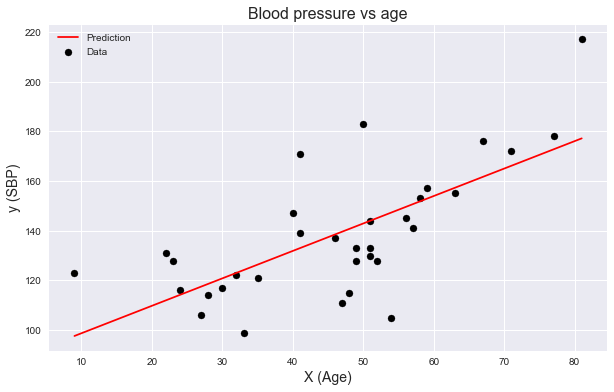

In [3]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(X, y, label="Data", color="k")
ax.set_title("Blood pressure vs age", fontsize=16)
ax.set_xlabel("X (Age)", fontsize=14)
ax.set_ylabel("y (SBP)", fontsize=14)

model = LinearRegression()
res = model.fit(X.reshape(-1,1), y)
X_vals = np.linspace(min(X), max(X), 200)
predictions = model.predict(X_vals.reshape(-1,1))
ax.plot(X_vals, predictions, label="Prediction", color="r")

ax.legend()

print(f"Intercept: {res.intercept_}, slope: {res.coef_[0]}")

In [4]:
def loss(X, y, a, b):

    n = len(X)

    return (1. / n) * np.sum((a * X + b - y)**2)

In [6]:
loss(X, y, 1.10, 87.6)

349.29936079545456

In [7]:
def grad_a(X, y, a, b):

    n = len(X)

    return (2./n) * np.sum((a*X + b - y)*X) 

In [9]:
grad_a(X, y, -0.5, 87.6)

-7686.957859848485

In [15]:
b = 87.6
a_ = -0.5
eta = 0.00045 #learning rate
a_history = [a_]

for i in range(5):

    grad_a_ = grad_a(X, y, a_, b)

    a_ -= eta*grad_a_

    a_history.append(a_)

    loss_val = loss(X, y, a_, b)

    print(f"{i}) a: {a_:.4f}, loss: {loss_val:.4f}")

0) a: 2.9591, loss: 8562.1042
1) a: -1.0304, loss: 11274.0492
2) a: 3.5709, loss: 14881.4981
3) a: -1.7360, loss: 19680.1458
4) a: 4.3847, loss: 26063.3333


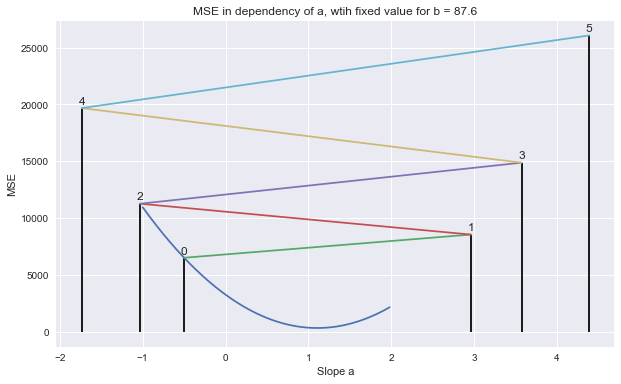

In [16]:
a = np.arange(-1, 2, 0.02)

mse = np.array([(loss(X, y, ai, b)) for ai in a])

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(a, mse)

ax.set_title("MSE in dependency of a, wtih fixed value for b = 87.6")

ax.set_xlabel("Slope a")

ax.set_ylabel("MSE")

# ax.set_ylim((0,10000))

# ax.set_xlim((-2,2))

for i, ah_i in enumerate(a_history):
    
    loss_ah_i = loss(X, y, ah_i, b)
    ax.vlines(
        x=ah_i,
        ymin=0,
        ymax=loss_ah_i,
        color="k"
    )
    ax.text(
        x=ah_i,
        y=loss_ah_i+600,
        s= i,
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=12
    )
    

for i in range(0, len(a_history)-1):
    ax.plot(
        [a_history[i], a_history[i+1]],[loss(X, y, a_history[i], b), loss(X, y, a_history[i+1], b)]
    )

Ahora pasemos al caso en el que tenemos dos variables, la pendiente y la ordenada al origen. En esta oportunidad, tenemos que trabajar con el gradiente de la función de pérdida:

$$ \nabla L(X; a,b) = \begin{bmatrix} \dfrac{\partial L}{\partial a} \\ \dfrac{\partial L}{\partial b}\end{bmatrix}$$

Las derivadas parciales con respecto a $a$ y $b$ son:

$$\dfrac{\partial L}{\partial a} = \dfrac{2}{n}\sum_{i=1}^{n}(a x_{i} + b - y_{i}) x_{i} $$

$$\dfrac{\partial L}{\partial b} = \dfrac{2}{n}\sum_{i=1}^{n}(a x_{i} + b - y_{i}) $$

La regla de actualización es ahora:

$$ a_{t+1} = a_{t} - \eta\dfrac{\partial L}{\partial a} $$

$$ b_{t+1} = b_{t} - \eta\dfrac{\partial L}{\partial b} $$

Primero vamos a generar un dataset sintético y ajustarlo utilizando sklearn.

In [17]:
np.random.seed(42)

n = 50
X = np.random.normal(0,1,n)
y = X + 1.0 + np.random.normal(0, 1, n)

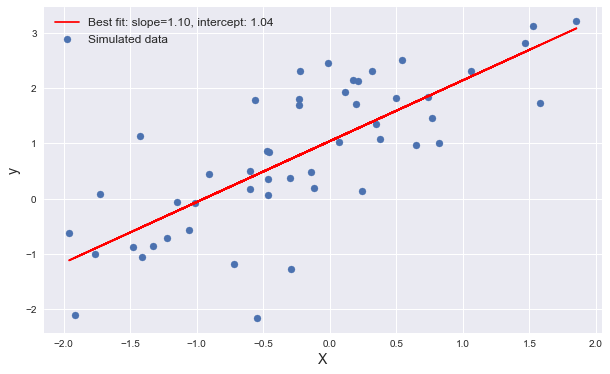

In [18]:
fig, ax = plt.subplots(figsize=(10,6))

model = LinearRegression()

res = model.fit(X.reshape(-1, 1), y)

predictions = model.predict(X.reshape(-1, 1))

ax.scatter(X, y, label="Simulated data")

ax.plot(X, predictions, label=f"Best fit: slope={model.coef_[0]:.2f}, intercept: {model.intercept_:.2f}", color="r")

ax.set_xlabel("X", fontsize=14)

ax.set_ylabel("y", fontsize=14)

ax.legend(fontsize=12)

In [19]:
loss(X, y, model.coef_[0], model.intercept_)

0.7400786858214785

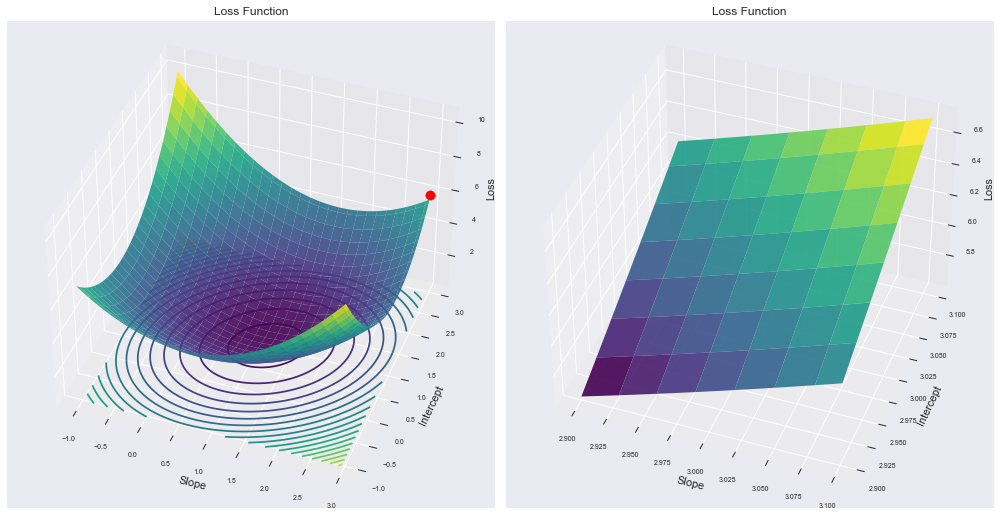

In [20]:
fig = plt.figure(figsize=(14,8))

ax = fig.add_subplot(1, 2, 1, projection="3d")

slope = intercept = np.arange(-1., 3.0, 0.05)

A, B = np.meshgrid(slope, intercept)

zs = np.array(
    [loss(X, y, slope, intercept) for slope, intercept in zip(np.ravel(A), np.ravel(B))]
)

loss_vals = zs.reshape(A.shape)

ax.plot_surface(
    A,
    B, 
    loss_vals,
    cmap="viridis", 
    rstride=3, 
    cstride=3, 
    edgecolor="none", 
    alpha=0.9
)

ax.contour(A, B, loss_vals, 20, cmap="viridis", linestyles="solid", offset=0)

ax.view_init(40, 290)

ax.set_xlabel('Slope')

ax.set_ylabel('Intercept')

ax.set_zlabel('Loss', rotation="vertical")

ax.set_title('Loss Function')

ax.scatter3D(2.95, 2.95, 6.1589, c="r",s=90)

plt.tick_params(axis='both', which='major', labelsize=7)

ax = fig.add_subplot(1, 2, 2, projection="3d")

slope = intercept = np.arange(2.9, 3.1, 0.01)

A, B = np.meshgrid(slope, intercept)

zs = np.array(
    [loss(X, y, slope,intercept) for slope, intercept in zip(np.ravel(A), np.ravel(B))]
)

loss_vals = zs.reshape(A.shape)

ax.plot_surface(A, B, loss_vals, cmap="viridis", rstride=3, cstride=3,edgecolor='none',alpha=0.9)

ax.contour(A, B, loss_vals, 20, cmap="viridis", linestyles="solid", offset=0)

ax.view_init(40, 290)

ax.set_xlabel('Slope')

ax.set_ylabel('Intercept')

ax.set_zlabel('Loss',rotation="vertical")

ax.set_title('Loss Function')

plt.tick_params(axis='both', which='major', labelsize=7)

fig.tight_layout()

Podemos ver que la función de pérdida tiene una forma de *bowl*. Las líneas de contorno en el fondo indican las posiciones en las que el valor del MSE es igual. En la figura de la derecha, se ve un zoom a la región en la que $a=b=3$. Vemos claramente que si disminuimos la pendiente y la ordenada al origen desde allí, el valor del MSE disminuye. Esta dirección es la que nos indica el negativo del gradiente de la función de pérdida.

In [21]:
def grad_b(X, y, a, b):

    n = len(X)

    return (2. / n) * np.sum(a*X+b - y)

In [22]:
a_ = 3.
b_ = 3.
loss_ = loss(X, y, a_, b_)
a_history = [a_]
b_history = [b_]
loss_history = [loss_]

eta = 0.1

for i in range(20):

    grad_a_, grad_b_ = grad_a(X, y, a_, b_), grad_b(X, y, a_, b_)

    a_ -= eta*grad_a_

    b_ -= eta*grad_b_

    loss_ = loss(X, y, a_, b_)

    a_history.append(a_)

    b_history.append(b_)

    loss_history.append(loss_)

    print(f"{i}) a = {a_:.4f}, b = {b_:.4f}, grad_a = {grad_a_:.4f}, grad_b = {grad_b_:.4f}, loss = {loss_:.4f}") 


0) a = 2.7449, b = 2.6937, grad_a = 2.5506, grad_b = 3.0625, loss = 4.6879
1) a = 2.5222, b = 2.4372, grad_a = 2.2270, grad_b = 2.5651, loss = 3.6190
2) a = 2.3283, b = 2.2220, grad_a = 1.9395, grad_b = 2.1525, loss = 2.8410
3) a = 2.1598, b = 2.0411, grad_a = 1.6854, grad_b = 1.8094, loss = 2.2743
4) a = 2.0136, b = 1.8887, grad_a = 1.4619, grad_b = 1.5236, loss = 1.8609
5) a = 1.8870, b = 1.7602, grad_a = 1.2660, grad_b = 1.2848, loss = 1.5593
6) a = 1.7775, b = 1.6517, grad_a = 1.0947, grad_b = 1.0849, loss = 1.3390
7) a = 1.6829, b = 1.5600, grad_a = 0.9455, grad_b = 0.9173, loss = 1.1781
8) a = 1.6014, b = 1.4824, grad_a = 0.8157, grad_b = 0.7765, loss = 1.0604
9) a = 1.5311, b = 1.4166, grad_a = 0.7030, grad_b = 0.6580, loss = 0.9744
10) a = 1.4705, b = 1.3608, grad_a = 0.6054, grad_b = 0.5581, loss = 0.9115
11) a = 1.4184, b = 1.3134, grad_a = 0.5210, grad_b = 0.4738, loss = 0.8655
12) a = 1.3736, b = 1.2731, grad_a = 0.4481, grad_b = 0.4025, loss = 0.8319
13) a = 1.3351, b = 1.

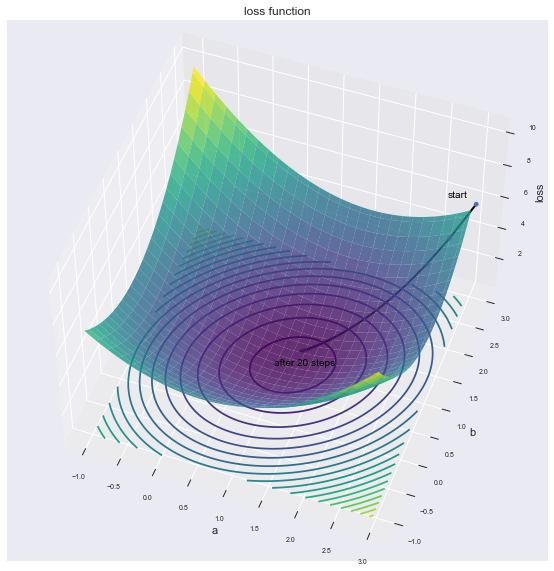

In [23]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1, projection="3d")
ax.plot3D(a_history, b_history, loss_history, 'black',lw=2)
a = b = np.arange(-1, 3.0, 0.05)
A, B = np.meshgrid(a, b)
zs = np.array([loss(X, y, a, b) for a,b in zip(np.ravel(A), np.ravel(B))])
loss_ = zs.reshape(A.shape)

ax.plot_surface(A, B, loss_, cmap="viridis", rstride=3, cstride=3, edgecolor='none', alpha=0.8)
ax.contour(A, B, loss_, 20, cmap="viridis", linestyles="solid", offset=0)
ax.view_init(50, 290)

ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('loss', rotation="vertical")
ax.set_title('loss function')
plt.tick_params(axis='both', which='major', labelsize=7)
ax.scatter3D(a_history, b_history, loss_history,"black")
ax.text(a_history[0]-0.4, b_history[0], loss_history[0], "start", color='black',zorder=100)
ax.text(a_history[-1]-0.4, b_history[-1], loss_history[-1]-1.5, "after 20 steps", color='black',zorder=100)

fig.tight_layout()